# Predicting Survival by Gender with Logistic Regression

In [160]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, roc_auc_score, mean_squared_error

### Map the gender back to un-encoded

In [161]:
def map_gender_to_mf(csv_file):
    #Read the csv file
    df = pd.read_csv(csv_file)
    
    #Map genders: assuming 0 = female, 1 = male
    df['gender'] = df['gender'].map({0: "Female", 1: "Male"})
    
    
    return df

mapped_data = map_gender_to_mf('data/survival_encoded.csv')


data = pd.DataFrame(mapped_data)
data

,Index,gender,survived
0,0,Female,1
1,1,Male,1
2,2,Male,0
3,3,Male,0
4,4,Female,0
...,...,...,...
995,995,Female,0
996,996,Male,0
997,997,Female,1
998,998,Male,1


In [162]:
# Display mapped data
data

,Index,gender,survived
0,0,Female,1
1,1,Male,1
2,2,Male,0
3,3,Male,0
4,4,Female,0
...,...,...,...
995,995,Female,0
996,996,Male,0
997,997,Female,1
998,998,Male,1


### Export un-encoded data

In [163]:
# Export un-encoded data
data.to_csv("data/survival_not_encoded.csv", columns=['Index', 'gender', 'survived'], index=False)

### Load the data

In [164]:
# Load the data
data = pd.read_csv("data/survival_not_encoded.csv")
df = pd.DataFrame(data)

df

,Index,gender,survived
0,0,Female,1
1,1,Male,1
2,2,Male,0
3,3,Male,0
4,4,Female,0
...,...,...,...
995,995,Female,0
996,996,Male,0
997,997,Female,1
998,998,Male,1


### One-hot-Encode the gender

In [165]:
# One-hot-Encode the gender
df_encoded = pd.get_dummies(df, columns=['gender']).astype(int)

df_encoded


,Index,survived,gender_Female,gender_Male
0,0,1,1,0
1,1,1,0,1
2,2,0,0,1
3,3,0,0,1
4,4,0,1,0
...,...,...,...,...
995,995,0,1,0
996,996,0,0,1
997,997,1,1,0
998,998,1,0,1


### Combine the encoded gender to a signle column

In [166]:
# Combine the encoded gender to a single column (gender)
df_encoded['gender'] = df_encoded['gender_Male'].replace({1: 1, 0: 0})

df_encoded

,Index,survived,gender_Female,gender_Male,gender
0,0,1,1,0,0
1,1,1,0,1,1
2,2,0,0,1,1
3,3,0,0,1,1
4,4,0,1,0,0
...,...,...,...,...,...
995,995,0,1,0,0
996,996,0,0,1,1
997,997,1,1,0,0
998,998,1,0,1,1


### Drop un-neccessary columns

In [167]:
# Drop un-neccessary columns
df_clean = df_encoded.drop(columns=["Index", "gender_Female", "gender_Male"], axis=1)

df_clean

,survived,gender
0,1,0
1,1,1
2,0,1
3,0,1
4,0,0
...,...,...
995,0,0
996,0,1
997,1,0
998,1,1


### Split the data

In [168]:
# Split the data
X = df_clean.drop(columns="survived")
y = df_clean['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Train the Logistic Regression model

In [169]:
# Train the Logistic Regression model
model = LogisticRegression()

model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


### Get the coeffiecient(s)


In [170]:
# Get the coefficient(s)
coefficients = model.coef_
print("Coeffiecients:", coefficients)

Coeffiecients: [[0.4385765]]


### Getting the probabilites for the positive class

In [171]:
# Getting the probabilities for the positive class
predicted_probs = model.predict_proba(X)[:, 1] 

### Create new column for probabilities

In [172]:
# Create new column for probabilities
df_clean['predicted_prob'] = predicted_probs
df_clean

,survived,gender,predicted_prob
0,1,0,0.553863
1,1,1,0.658107
2,0,1,0.658107
3,0,1,0.658107
4,0,0,0.553863
...,...,...,...
995,0,0,0.553863
996,0,1,0.658107
997,1,0,0.553863
998,1,1,0.658107


### Group by gender to see average predicted survival probabilities


In [173]:
# Group by gender to see average predicted survival probabilities
gender_group = df_clean.groupby('gender')['predicted_prob'].mean()

In [174]:
print(gender_group)

gender
0    0.553863
1    0.658107
Name: predicted_prob, dtype: float64


### Model Performance on Seen Data (Training Set)

In [175]:
# Predict on training set
y_train_pred = model.predict(X_train)
y_train_proba = model.predict_proba(X_train)[:, 1]

# Scores on training data
train_accuracy = accuracy_score(y_train, y_train_pred)
train_auc = roc_auc_score(y_train, y_train_proba)
train_mse = mean_squared_error(y_train, y_train_pred)

print("Training Accuracy:", train_accuracy)
print("Training AUC:", train_auc)
print("Training MSE:", train_mse)


Training Accuracy: 0.60625
Training AUC: 0.5557355588283422
Training MSE: 0.39375


### Model Performance on Unseen Data (Test Set)

In [176]:
# Predict on test set
y_test_pred = model.predict(X_test)
y_test_proba = model.predict_proba(X_test)[:, 1]

# Scores on test data
test_accuracy = accuracy_score(y_test, y_test_pred)
test_auc = roc_auc_score(y_test, y_test_proba)
test_mse = mean_squared_error(y_test, y_test_pred)

print("Test Accuracy:", test_accuracy)
print("Test AUC:", test_auc)
print("Test MSE:", test_mse)


Test Accuracy: 0.64
Test AUC: 0.5889756944444444
Test MSE: 0.36


### Visualization to Compare

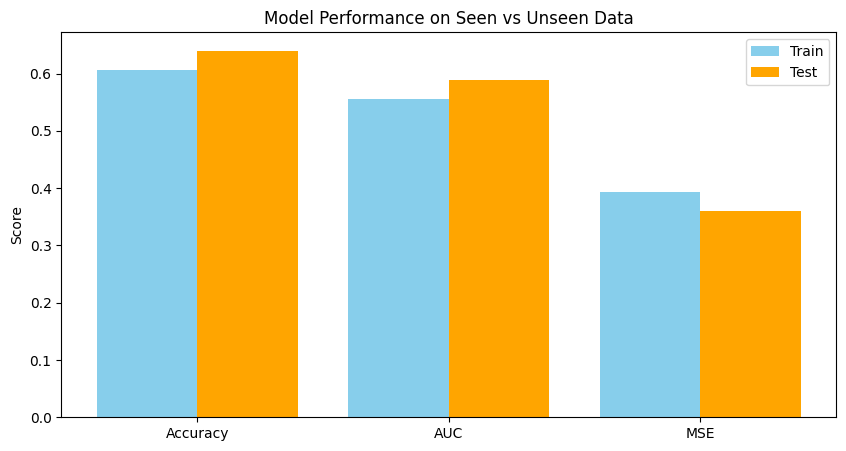

In [177]:
metrics = ['Accuracy', 'AUC', 'MSE']
train_scores = [train_accuracy, train_auc, train_mse]
test_scores = [test_accuracy, test_auc, test_mse]

x = range(len(metrics))
plt.figure(figsize=(10, 5))
plt.bar(x, train_scores, width=0.4, label='Train', align='center', color='skyblue')
plt.bar([i + 0.4 for i in x], test_scores, width=0.4, label='Test', align='center', color='orange')
plt.xticks([i + 0.2 for i in x], metrics)
plt.ylabel('Score')
plt.title('Model Performance on Seen vs Unseen Data')
plt.legend()
plt.show()